<a href="https://colab.research.google.com/github/Hlamulo1/Twitter_sentiments/blob/main/Twitter_Task_Sentiment_analysis(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install NLTK toolkit for NLP tasks**``



In [ ]:
!pip install nltk

**Import NLTK** **toolkit**












In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Download wordnet**

In [ ]:

!python -m nltk.downloader wordnet

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Import the necessary libraries**

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

**Mount the dataset utilizing google drive as storage**

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Change the working directory to the location of your data
%cd '/content/drive/My Drive/Dataset'




Mounted at /content/drive
/content/drive/My Drive/Dataset


**Load the dataset**

In [ ]:
# Load the dataset
train_set_path = 'train.csv'
test_set_path = 'test.csv'

df1 = pd.read_csv(train_set_path)
df2 = pd.read_csv(test_set_path)

**Preprocess the dataset**

In [ ]:
# Function to preprocess text data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply preprocessing to the text columns in df1 and df2
df1['clean_text'] = df1['message'].apply(preprocess_text)
df2['clean_text'] = df2['message'].apply(preprocess_text)



**Define features and target variable**

In [ ]:

# Define features and target variable
X = df1['clean_text']
y = df1['sentiment']


**Split data into training and validation sets**

In [ ]:

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

**Create a pipeline with TF-IDF vectorizer and Random Forest classifier model**

In [ ]:

# Create a pipeline with TF-IDF vectorizer and Random Forest classifier model
pipeline = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

**Train the model**

In [ ]:

# Train the model on the training set
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier', RandomForestClassifier())])

**Predict Sentiments**

In [ ]:

# Predict sentiment on the validation set
valid_predictions = pipeline.predict(X_valid)

**Calculate F1 score on the validation set**

In [ ]:

# Calculate F1 score on the validation set
f1 = f1_score(y_valid, valid_predictions, average='weighted')

**Train the model on the entire training set**

In [ ]:
# Train the model on the entire training set
pipeline.fit(X, y)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier', RandomForestClassifier())])

**Predict sentiment on the test data**

In [ ]:
# Predict sentiment on the test data
predictions = pipeline.predict(df2['clean_text'])


**Create a DataFrame with tweetid and sentiment**


In [ ]:

# Create a DataFrame with tweetid and sentiment
submission_df = pd.DataFrame({'tweetid': df2['tweetid'], 'sentiment': predictions})

**Save the DataFrame to a CSV file**

In [ ]:

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)



**Print Completion message**

In [ ]:
# Print message
print("Submission file saved as 'submission.csv'. You can download it now.")

Submission file saved as 'submission.csv'. You can download it now.


**Print the F1 Score**

In [ ]:
print(f"F1 Score on Validation Set: {f1}")

F1 Score on Validation Set: 0.6758267883256702


**Plot the F1 score**

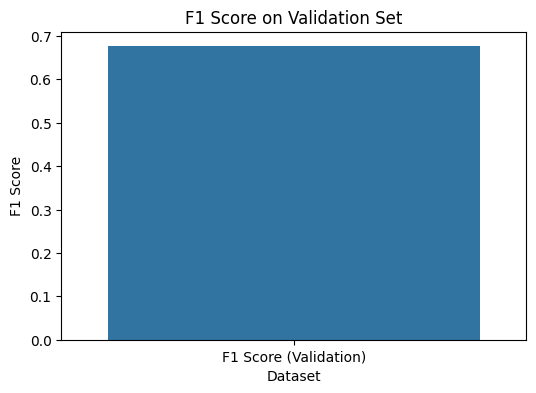

In [ ]:
# Plotting F1 score
plt.figure(figsize=(6, 4))
sns.barplot(x=['F1 Score (Validation)'], y=[f1])
plt.title('F1 Score on Validation Set')
plt.ylabel('F1 Score')
plt.xlabel('Dataset')
plt.show()


**Download the Submission file**

In [ ]:
from google.colab import files

# Download the file
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>